Loan Eligibility predicition EDA

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

**making model -> training data


testing the accuracy -> testing data**

In [3]:
dataset = pd.read_csv('/content/train.csv')
#s = read_csv('/content/test.csv')

In [8]:
dataset.head(15)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [7]:
dataset.shape

(614, 13)

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [13]:
pd.crosstab(dataset['Credit_History'], dataset['Loan_Status'], margins = True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


<Axes: xlabel='Loan_Status', ylabel='count'>

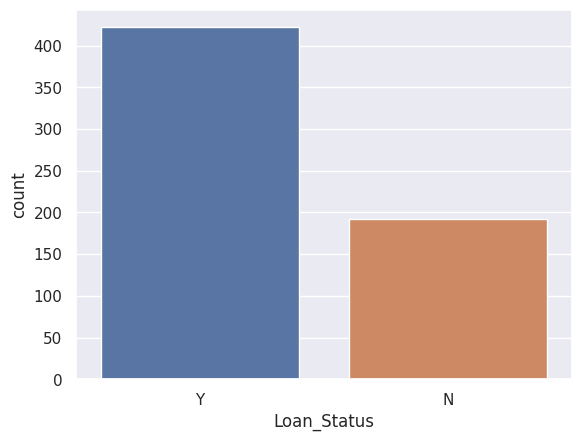

In [14]:
#loan _status

sns.countplot(x=dataset['Loan_Status'], hue=dataset['Loan_Status'])

192 people - Loan got rejected
400 people - Loan accepted

([<matplotlib.patches.Wedge at 0x798292694790>,
 [Text(-0.9168069130532235, 0.6078363958976293, 'Male'),
  Text(0.916806913053223, -0.6078363958976297, 'Female')],
 [Text(-0.5000764980290309, 0.33154712503507044, '81.4%'),
  Text(0.5000764980290308, -0.3315471250350707, '18.6%')])

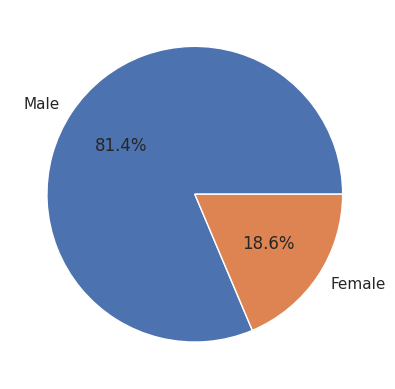

In [16]:
#gender
gender_counts = dataset['Gender'].value_counts()

plt.pie(gender_counts, labels = gender_counts.index, autopct = '%1.1f%%')

81.4% male --> Loan
18.6% females --> loan

<Axes: xlabel='Education', ylabel='count'>

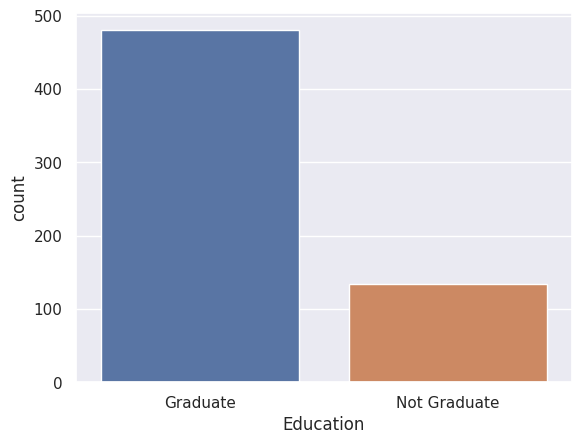

In [17]:
#education

sns.countplot(x= dataset['Education'], hue = dataset['Education'])


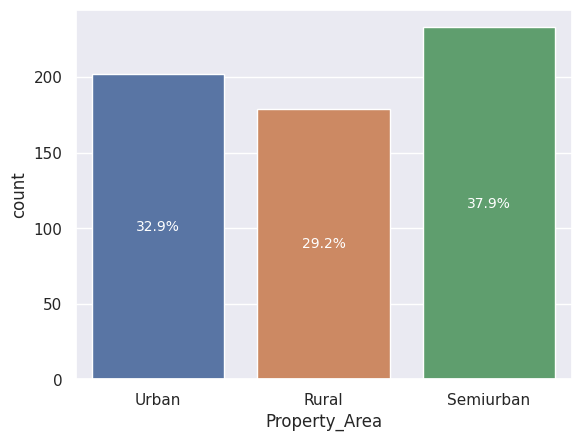

In [22]:
#property area

graph = sns.countplot(x= dataset['Property_Area'], hue = dataset['Property_Area'])
total = len(dataset['Property_Area'])

for p in graph.patches:
  height = p.get_height()
  graph.annotate(f'{height/total:.1%}',(p.get_x()+ p.get_width()/2., height/2), ha = 'center', va = 'center', fontsize = 10, color = 'white')

<Axes: >

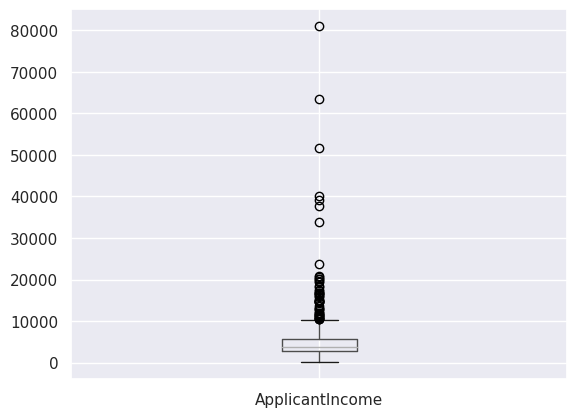

In [23]:
# applicant income

dataset.boxplot(column = 'ApplicantIncome')

<Axes: >

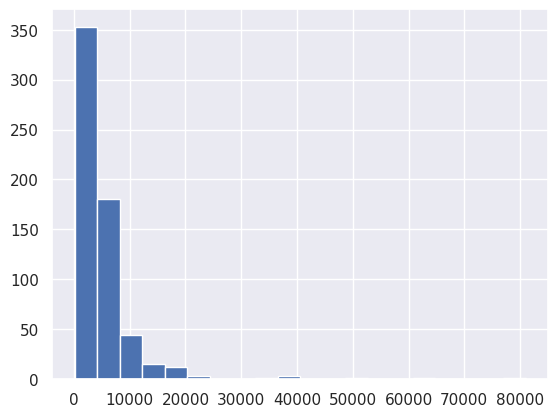

In [27]:
dataset['ApplicantIncome'].hist(bins=20)

<Axes: ylabel='CoapplicantIncome'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 40.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


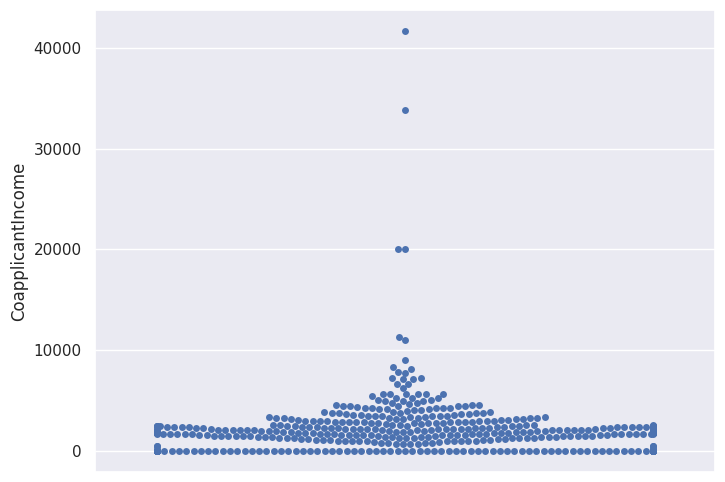

In [25]:
#coapplicant income

plt.figure(figsize=(8,6))
sns.swarmplot(y=dataset['CoapplicantIncome'])

<Axes: >

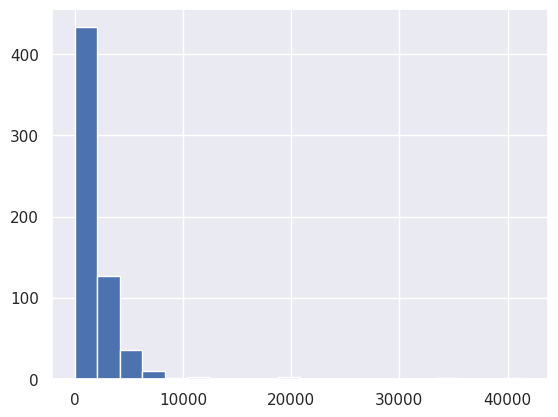

In [26]:
dataset['CoapplicantIncome'].hist(bins =20)

<Axes: xlabel='LoanAmount', ylabel='Count'>

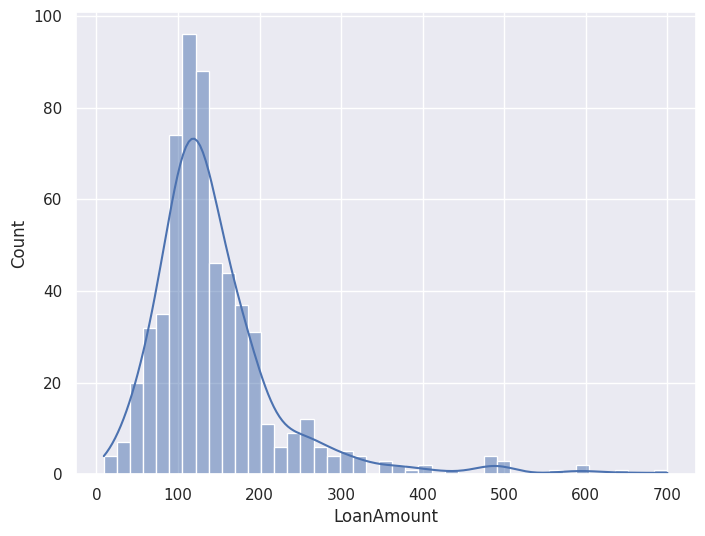

In [28]:
#Loan amount

plt.figure(figsize=(8,6))

sns.histplot(dataset['LoanAmount'], kde = True)

<Axes: >

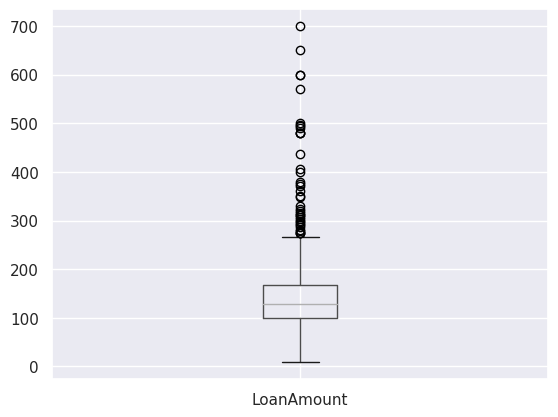

In [29]:
dataset.boxplot(column='LoanAmount')

<Axes: >

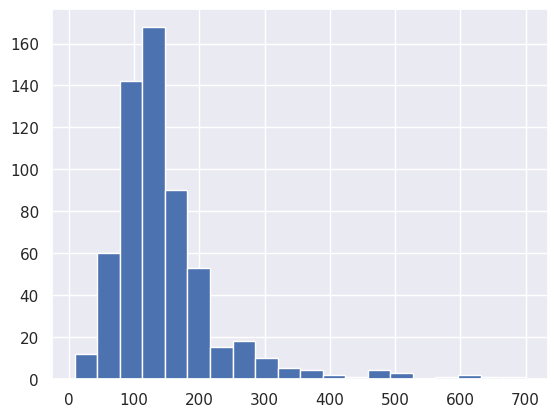

In [30]:
dataset['LoanAmount'].hist(bins=20)

<Axes: xlabel='Loan_Amount_Term', ylabel='count'>

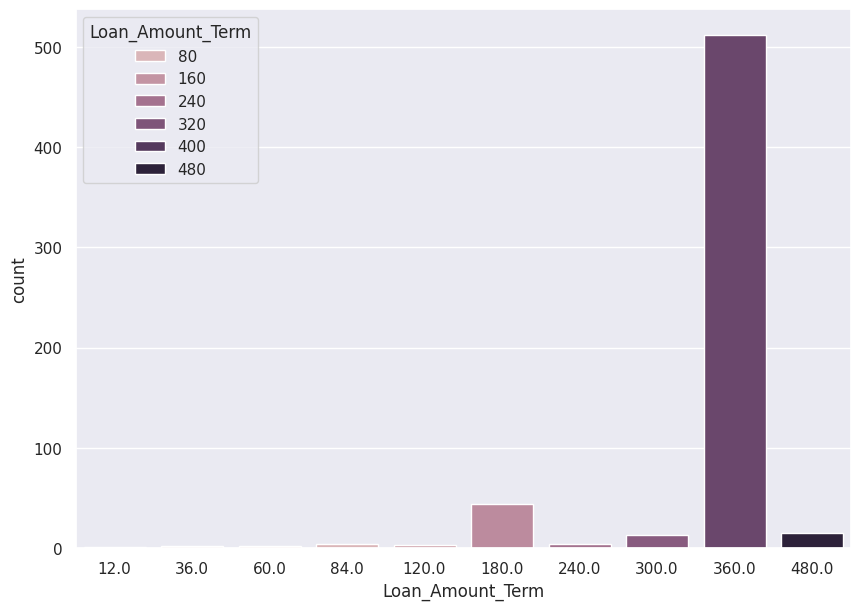

In [32]:
#loan amount term

plt.figure(figsize = (10,7))
sns.countplot(x=dataset['Loan_Amount_Term'], hue=dataset['Loan_Amount_Term'])

<Axes: title={'center': 'ApplicantIncome'}, xlabel='Education'>

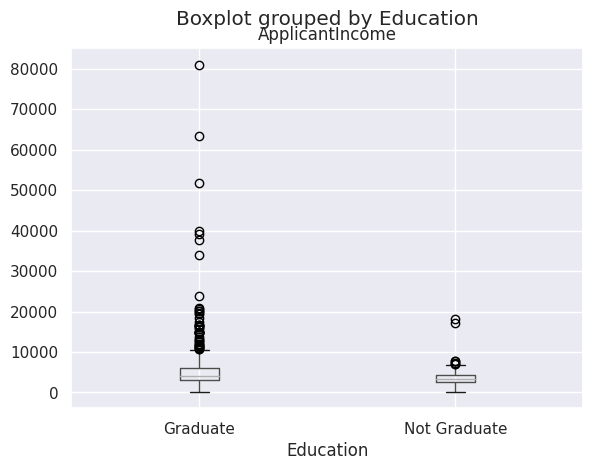

In [33]:
# Applicant Income vs Education

dataset.boxplot(column = 'ApplicantIncome', by='Education')

In [34]:
#Normalization

dataset['LoanAmount_log'] = np.log(dataset['LoanAmount'])


<Axes: >

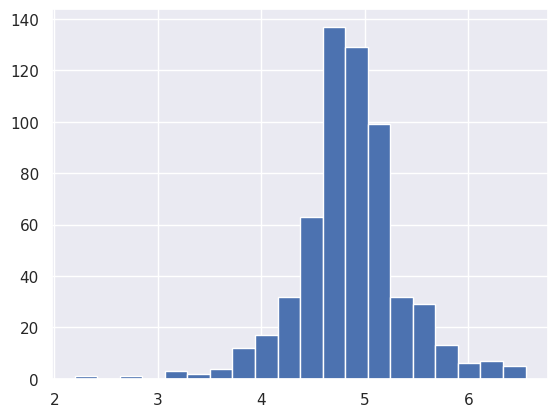

In [36]:
dataset['LoanAmount_log'].hist(bins = 20)

In [40]:

dataset['totalincome']=dataset['ApplicantIncome']+dataset['CoapplicantIncome']
dataset['totalincome_log']=np.log(dataset['totalincome'])

<Axes: >

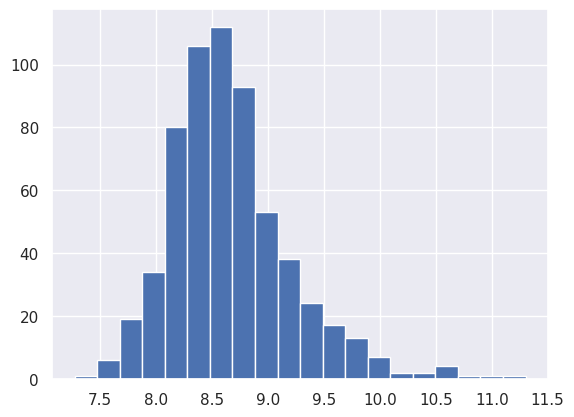

In [41]:
dataset['totalincome_log'].hist(bins = 20)

In [42]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,totalincome,totalincome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,NaN,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


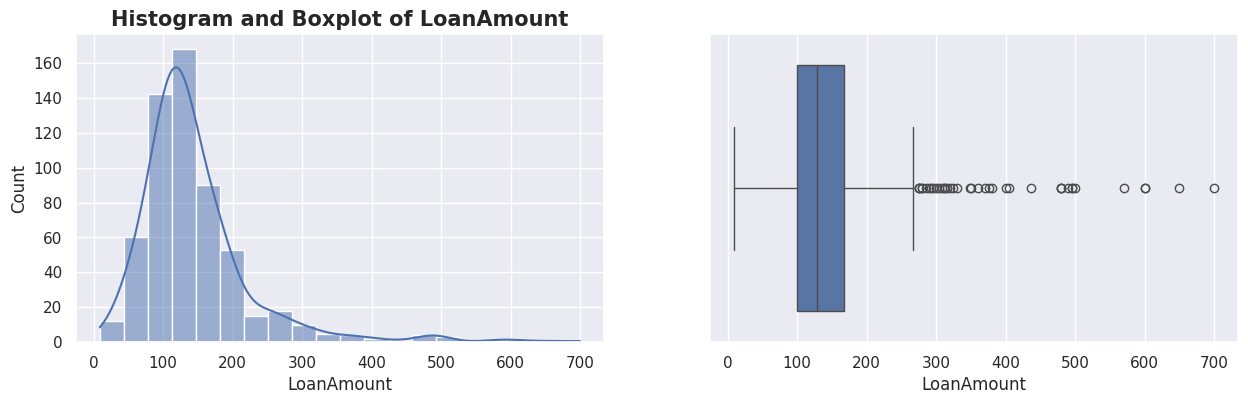

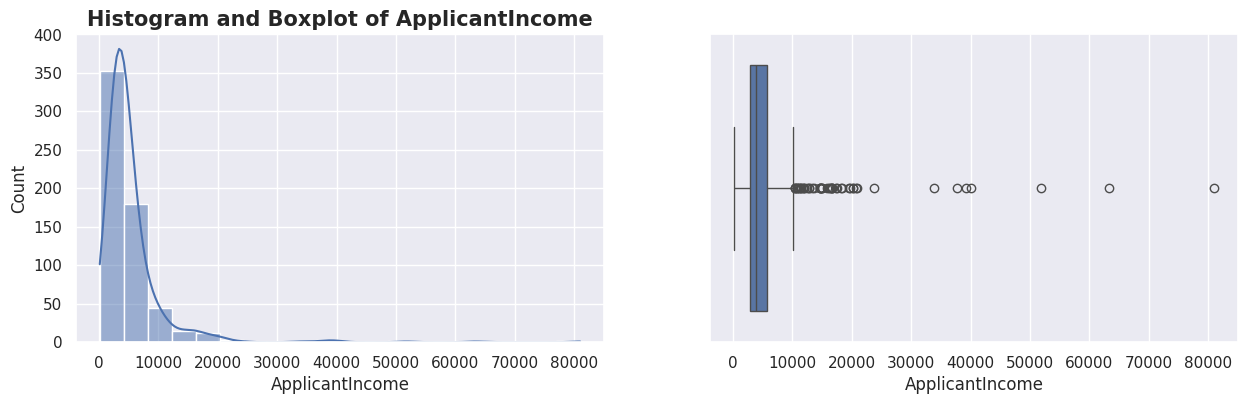

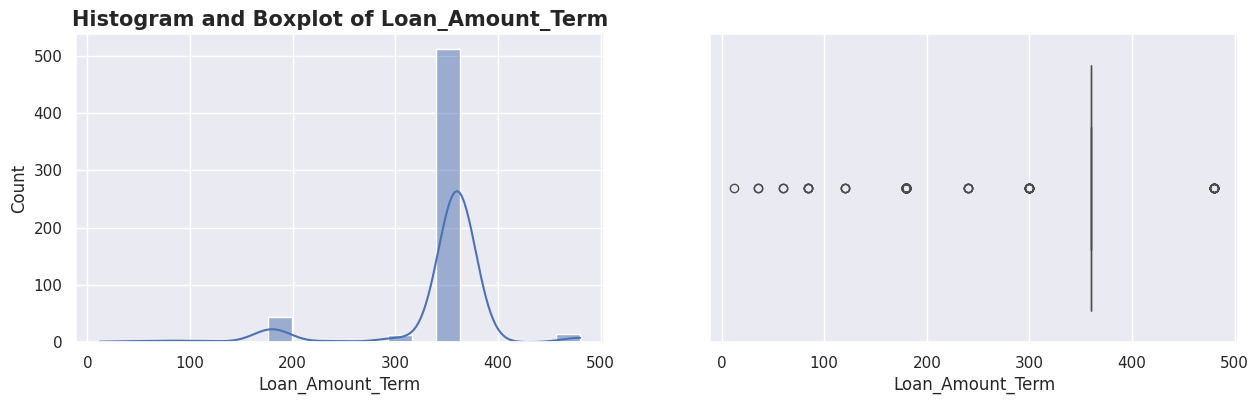

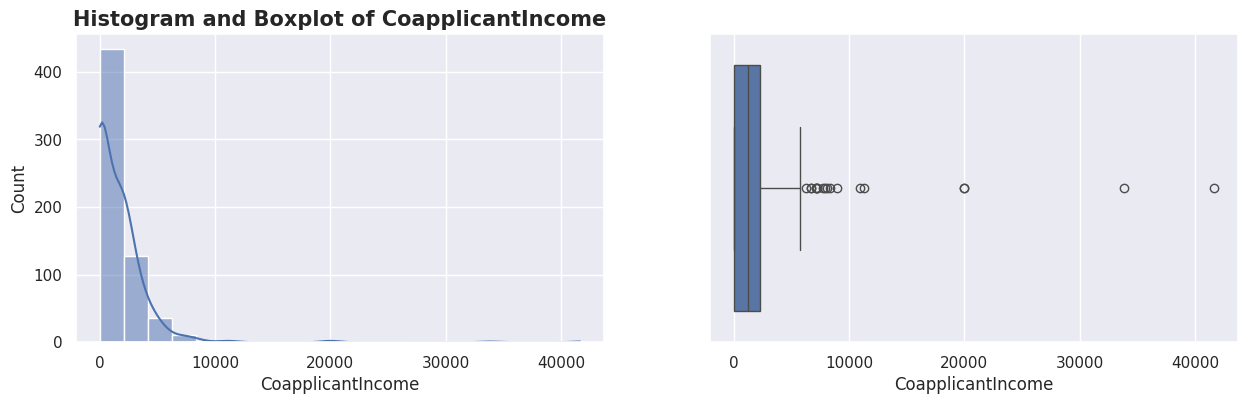

In [44]:
#handling outliers

col_outliers = ['LoanAmount', 'ApplicantIncome', 'Loan_Amount_Term', 'CoapplicantIncome']

for col in col_outliers:
  fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,4))
  sns.histplot(data=dataset, x = col, bins= 20, kde = True, ax=ax1)
  sns.boxplot(data = dataset, x=col,ax=ax2 )
  ax1.set_title(f'Histogram and Boxplot of {col}', size = 15, weight = 'bold')
  plt.show()

In [48]:
def remove_outlier(data, col, k=1.5):
  for c in col:
    q1 = data[c].quantile(0.25)
    q3 = data[c].quantile(0.75)
    iqr = q3-q1
    lower_bound = q1 - k*iqr
    upper_bound = q3 + k*iqr
    data = data[(data[c]>=lower_bound) & (data[c]<=upper_bound)]

  return data

col_outliers = ['LoanAmount', 'ApplicantIncome', 'Loan_Amount_Term', 'CoapplicantIncome']

data = remove_outlier(dataset, col_outliers)


In [49]:
#missing values

dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log       22
totalincome           0
totalincome_log       0
dtype: int64

In [52]:
mode_value = dataset['Gender'].mode()[0]
dataset['Gender'] = dataset['Gender'].fillna(mode_value)

mode_value = dataset['Married'].mode()[0]
dataset['Married'] = dataset['Married'].fillna(mode_value)

mode_value = dataset['Dependents'].mode()[0]
dataset['Dependents'] = dataset['Dependents'].fillna(mode_value)

mode_value = dataset['Self_Employed'].mode()[0]
dataset['Self_Employed'] = dataset['Self_Employed'].fillna(mode_value)

mode_value = dataset['Credit_History'].mode()[0]
dataset['Credit_History'] = dataset['Credit_History'].fillna(mode_value)



In [55]:
dataset.LoanAmount = dataset.LoanAmount.fillna(dataset.LoanAmount.mean())
dataset.LoanAmount_log = dataset.LoanAmount_log.fillna(dataset.LoanAmount_log.mean())
dataset.Loan_Amount_Term = dataset.Loan_Amount_Term.fillna(dataset.Loan_Amount_Term.mean())

In [56]:
dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
totalincome          0
totalincome_log      0
dtype: int64

In [60]:
#Splitting the dataset

x = dataset.iloc[:, np.r_[1:5, 9:11, 13:15]].values

y = dataset.iloc[:, 12].values

In [61]:
x


array([['Male', 'No', '0', ..., 1.0, 4.857444178729352, 5849.0],
       ['Male', 'Yes', '1', ..., 1.0, 4.852030263919617, 6091.0],
       ['Male', 'Yes', '0', ..., 1.0, 4.189654742026425, 3000.0],
       ...,
       ['Male', 'Yes', '1', ..., 1.0, 5.53338948872752, 8312.0],
       ['Male', 'Yes', '2', ..., 1.0, 5.231108616854587, 7583.0],
       ['Female', 'No', '0', ..., 0.0, 4.890349128221754, 4583.0]],
      dtype=object)

In [62]:
y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

In [79]:
from sklearn.model_selection import train_test_split
X_train, Y_train, X_test, Y_test = train_test_split(x, y, test_size=0.2, random_state = 0)

In [64]:
# Label Encoding

from sklearn.preprocessing import LabelEncoder
labelencoder_x = LabelEncoder()

In [68]:
for i in range(0,5):
  X_train[:, i]= labelencoder_x.fit_transform(X_train[:, i])

In [73]:
X_train[:, i ] = labelencoder_x.fit_transform(X_train[:, 7])

In [74]:
X_train

array([[1, 1, 0, ..., 1.0, 4.875197323201151, 5858.0],
       [1, 0, 1, ..., 1.0, 5.278114659230517, 11250.0],
       [1, 1, 0, ..., 0.0, 5.003946305945459, 5681.0],
       ...,
       [1, 1, 3, ..., 1.0, 5.298317366548036, 8334.0],
       [1, 1, 0, ..., 1.0, 5.075173815233827, 6033.0],
       [0, 1, 0, ..., 1.0, 5.204006687076795, 6486.0]], dtype=object)

In [90]:
#Scaling

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X_train = ss.fit_transform(X_train)

ValueError: could not convert string to float: 'Male'

In [83]:
X_train

array([['Male', 'Yes', '0', ..., 1.0, 4.875197323201151, 5858.0],
       ['Male', 'No', '1', ..., 1.0, 5.278114659230517, 11250.0],
       ['Male', 'Yes', '0', ..., 0.0, 5.003946305945459, 5681.0],
       ...,
       ['Male', 'Yes', '3+', ..., 1.0, 5.298317366548036, 8334.0],
       ['Male', 'Yes', '0', ..., 1.0, 5.075173815233827, 6033.0],
       ['Female', 'Yes', '0', ..., 1.0, 5.204006687076795, 6486.0]],
      dtype=object)